In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [99]:
tree = pd.read_csv('../Data/tree_algorithm/set_tree.csv')
sdf = pd.read_csv('../Data/tree_algorithm/set_particles.csv')
tree

,x_min,y_min,side,depth,n
0,0.0000,0.0000,1.0000,0,100
1,0.0000,0.0000,0.1250,1,1
2,0.1250,0.0000,0.1250,1,2
3,0.2500,0.0000,0.1250,1,2
4,0.3750,0.0000,0.1250,1,0
...,...,...,...,...,...
116,0.5000,0.9375,0.0625,2,0
117,0.5625,0.9375,0.0625,2,1
118,0.6250,0.8750,0.1250,1,1
119,0.7500,0.8750,0.1250,1,0


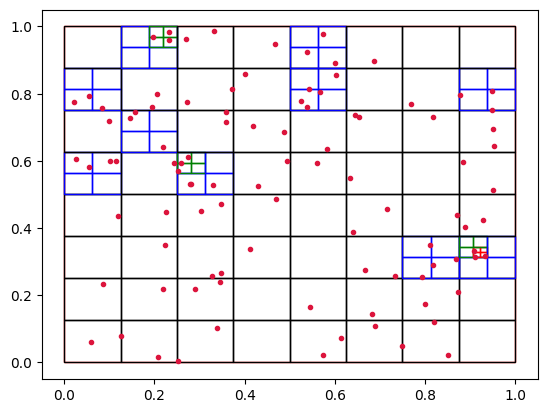

In [100]:
from matplotlib.patches import Rectangle

col=["k","blue", "green", "red"]
#add rectangle
for i in range(tree.shape[0]):
    plt.gca().add_patch(Rectangle((tree["x_min"][i],tree["y_min"][i]),tree["side"][i],tree["side"][i],
                    edgecolor=col[tree["depth"][i]-1],
                    facecolor='none',
                    lw=1))
plt.plot(sdf['x'], sdf['y'], '.', color='crimson')
#plt.xlim(0, 1)
#plt.ylim(0, 1)
plt.show()